Create a Linear Regression Model using Python to predict home prices using Boston
Housing Dataset. The objective is to predict the value of prices of the house using the given
features

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('/content/drive/MyDrive/DSBDAL_Exam/HousingData.csv')

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [64]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [65]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [66]:
df.shape

(506, 14)

In [67]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [69]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [70]:
mean_value = df['CRIM'].mean()

In [71]:
means = df.mean()
df.fillna(value=means, inplace=True)
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [72]:
target_feature = 'MEDV'

In [73]:
x = df.drop(target_feature, axis=1)
y = df[target_feature]

In [74]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432


In [75]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [77]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [78]:
regression.fit(x_train, y_train)

LinearRegression()

In [79]:
train_score=round(regression.score(x_train,y_train)*100,2)
print('Train score of Linear Regression:',train_score)

Train score of Linear Regression: 76.49


In [80]:
print('Coefficients" ', regression.coef_)

Coefficients"  [-1.26194005e-01  3.76363553e-02 -6.26295345e-02  2.70382928e+00
 -1.45015824e+01  4.08006958e+00 -2.11509464e-02 -1.41798662e+00
  1.96343241e-01 -8.70651696e-03 -1.01396225e+00  8.29504244e-03
 -4.19861039e-01]


In [81]:
predictions = regression.predict(x_test)

In [82]:
predictions

array([26.175296  , 22.64747588, 29.1456294 , 11.52971235, 21.65312134,
       19.42320699, 20.18413017, 21.46914355, 19.1985363 , 19.98228162,
        4.32483046, 16.16891668, 16.87682404,  5.31232373, 39.36827861,
       33.09358732, 21.9152876 , 36.61918436, 31.52676377, 23.52713482,
       24.96022461, 23.69866912, 20.88033802, 30.55074901, 22.74081741,
        8.66805959, 17.65119072, 17.93088633, 36.01223185, 21.16299556,
       17.83464361, 17.43306603, 19.5240167 , 23.50605522, 28.97262793,
       19.21808862, 11.23997435, 23.94256597, 17.86786717, 15.40849806,
       26.3630836 , 21.5193299 , 23.78733694, 14.84041522, 23.9445175 ,
       24.97067627, 20.11366175, 23.08636158, 10.42208266, 24.52832122,
       21.60847326, 18.66228165, 24.53362832, 31.03502944, 12.97457826,
       22.38536236, 21.34822822, 16.10928673, 12.37477824, 22.78596712,
       18.28714824, 21.91802045, 32.49771603, 31.21256855, 17.47867791,
       33.18861907, 19.17896285, 19.94662594, 20.17142015, 23.90

Text(0, 0.5, 'Predicted Y')

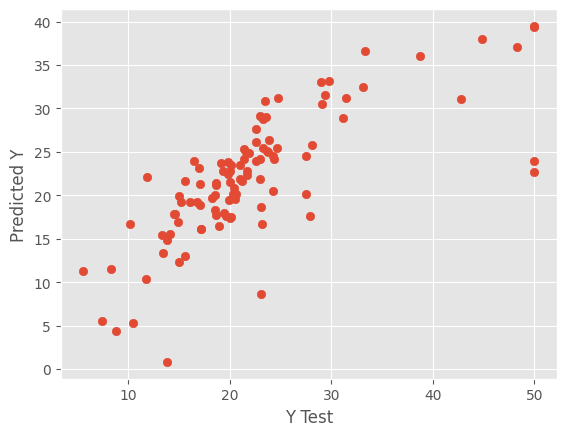

In [83]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [84]:
from sklearn.metrics import r2_score
score = round(r2_score(y_test,predictions)*100,2)
print("r_2 score:", score)

r_2 score: 57.03


In [85]:
round(regression.score(x_test, y_test)*100,2)

57.03

In [86]:
from sklearn import metrics
print('Mean Absolute Error on test data of Linear Regression: ',metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error on test data of Linear Regression: ',metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error on test data of Linear Regression: ',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error on test data of Linear Regression:  3.961621123959121
Mean Squared Error on test data of Linear Regression:  34.987389544238766
Root Mean Squared Error on test data of Linear Regression:  5.915013909048631


In [87]:
df1 = pd.DataFrame({'Actual':y_test, 'Predicted':predictions, 'Variance':y_test-predictions})
df1.head()

,Actual,Predicted,Variance
329,22.6,26.175296,-3.575296
371,50.0,22.647476,27.352524
219,23.0,29.145629,-6.145629
403,8.3,11.529712,-3.229712
78,21.2,21.653121,-0.453121


In [88]:
df.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.000000,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.000000,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.000000,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.000000,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.000000,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2
5,0.02985,0.0,2.18,0.000000,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000,28.7
6,0.08829,12.5,7.87,0.069959,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.430000,22.9
7,0.14455,12.5,7.87,0.000000,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.150000,27.1
8,0.21124,12.5,7.87,0.000000,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.930000,16.5
9,0.17004,12.5,7.87,0.069959,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.100000,18.9


In [89]:
regression.predict([[0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4,307,21.0,396.60,8.26]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.58009845])

In [90]:
regression.intercept_

35.04016602948733

In [91]:
regression.coef_

array([-1.26194005e-01,  3.76363553e-02, -6.26295345e-02,  2.70382928e+00,
       -1.45015824e+01,  4.08006958e+00, -2.11509464e-02, -1.41798662e+00,
        1.96343241e-01, -8.70651696e-03, -1.01396225e+00,  8.29504244e-03,
       -4.19861039e-01])

In [92]:
lr_coefficient = pd.DataFrame()
lr_coefficient["columns"] = x_train.columns
lr_coefficient['Coefficient Estimate'] = pd.Series(regression.coef_)
print(lr_coefficient)

    columns  Coefficient Estimate
0      CRIM             -0.126194
1        ZN              0.037636
2     INDUS             -0.062630
3      CHAS              2.703829
4       NOX            -14.501582
5        RM              4.080070
6       AGE             -0.021151
7       DIS             -1.417987
8       RAD              0.196343
9       TAX             -0.008707
10  PTRATIO             -1.013962
11        B              0.008295
12    LSTAT             -0.419861


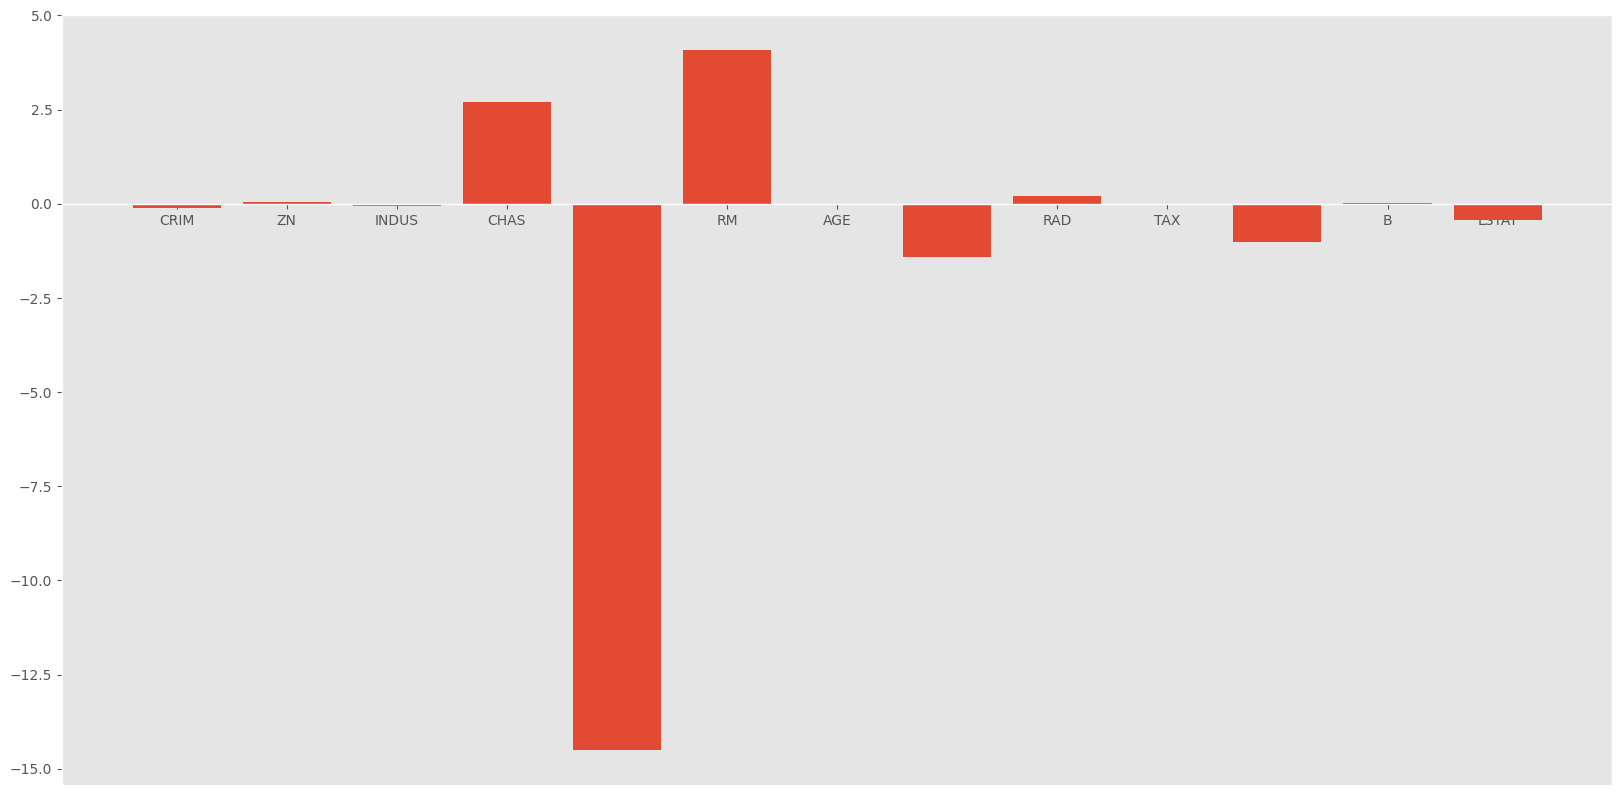

In [93]:
fig, ax = plt.subplots(figsize =(20, 10))

ax.bar(lr_coefficient["columns"],
lr_coefficient['Coefficient Estimate'])

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.grid()
plt.show()

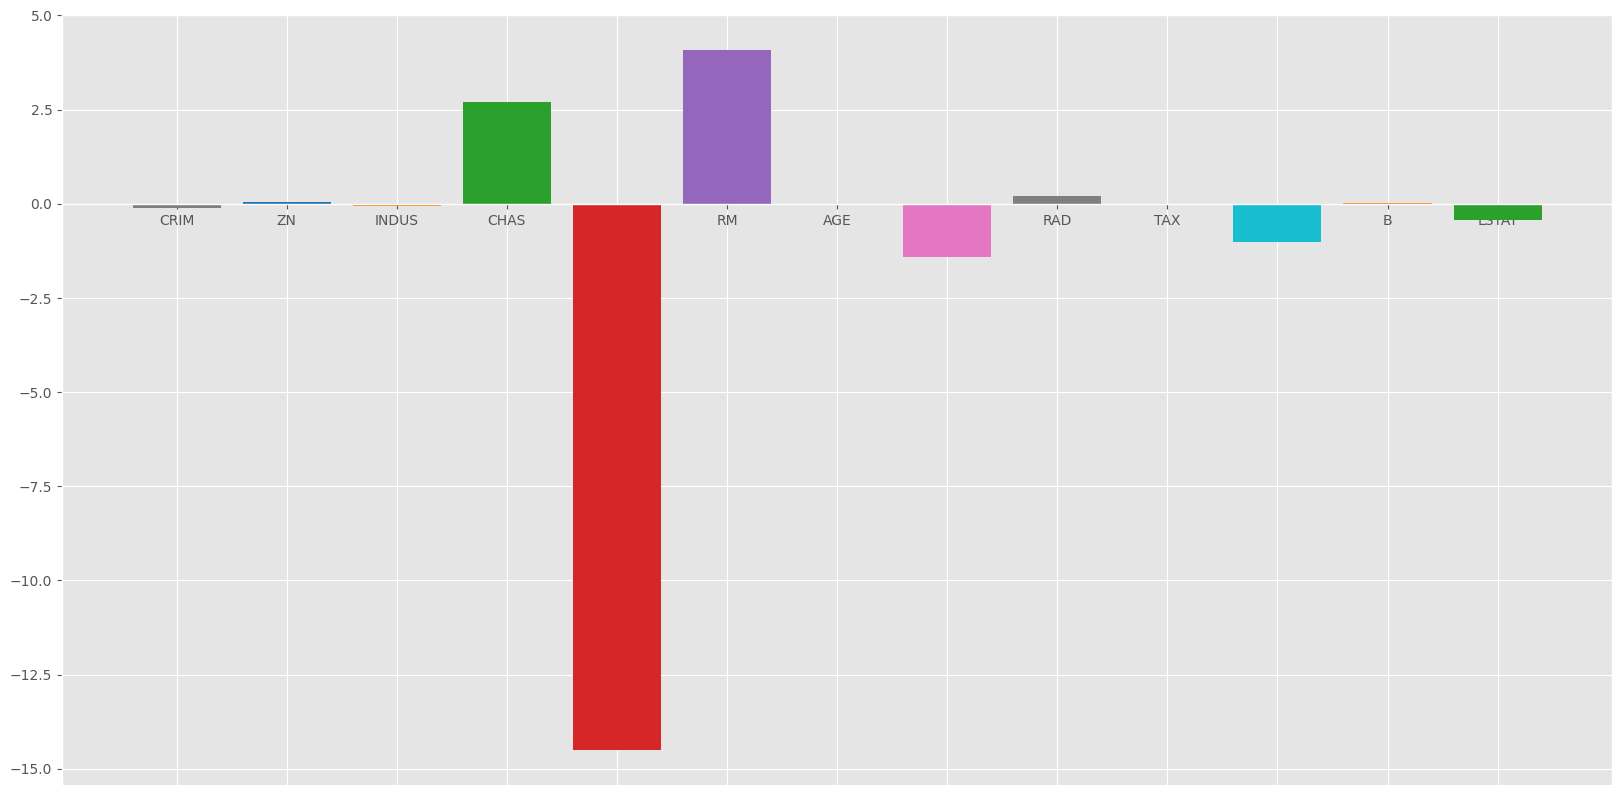

In [94]:
fig, ax = plt.subplots(figsize =(20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lr_coefficient["columns"],
lr_coefficient['Coefficient Estimate'],color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()